In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
df['yearMonth'] = pd.to_datetime('01-' + df['month'].astype(str) + "-" + df['year'].astype(str))
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [6]:
df.set_index("yearMonth", inplace=True)
df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

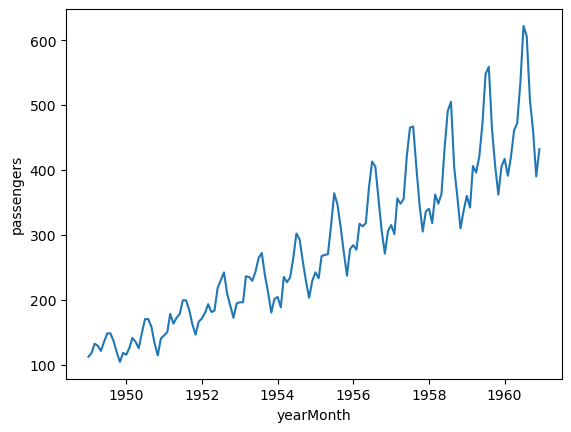

In [7]:
sns.lineplot(data=df, x=df.index, y=df.passengers)

## Classify Time Series

1. Trend
2. Seasonal
3. Cyclic
4. Irregular

### Stationarity

Mean & Variance don't vary by the time.

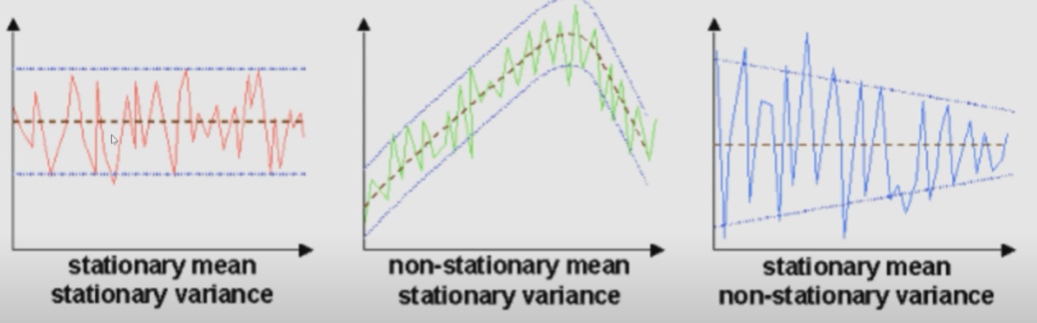

#### How to Check the Stationarity

1. ADF : Augmented Dickey-Fuller Test
    - Test Statistics < Critical Values
2. Rolling Statistics

In [8]:
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

<AxesSubplot:xlabel='yearMonth', ylabel='passengers'>

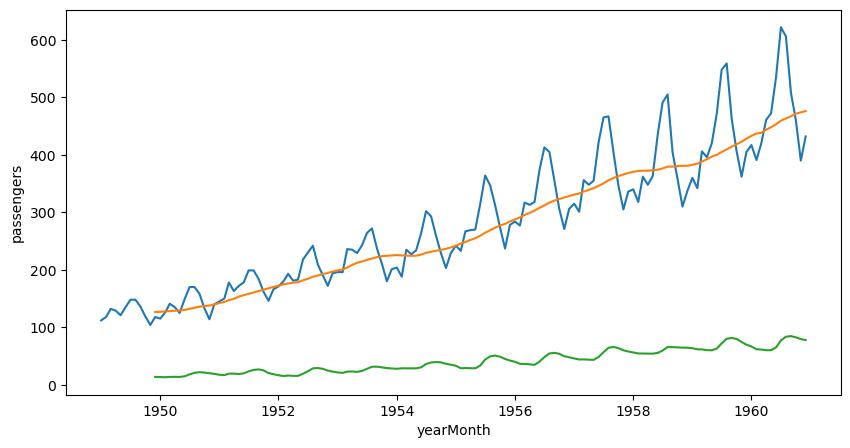

In [9]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfTest = adfuller(df['passengers'], autolag='AIC')

In [12]:
adfTest

(0.8153688792060587,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
stats = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'number of observations used'])
stats

Test Statistics                  0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [14]:
for key, values in adfTest[4].items():
    print('criticality', key, ':', values)

criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


### Making data Stationary

1. Time Shift
2. Log
3. Square Root, Cube

#### Time Shift

In [17]:
def test_stationarity(dataframe, var):
    dataframe['rollMean'] = dataframe[var].rolling(window=12).mean()
    dataframe['rollStd'] = dataframe[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataframe[var], autolag='AIC') 
    stats = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', '#lag used', 'number of observations used']) 
    print(stats)
    
    for key, values in adfTest[4].items():
        print("criticality", key, ':', values)
    
    sns.lineplot(data=dataframe, x=dataframe.index, y=var)
    sns.lineplot(data=dataframe, x=dataframe.index, y='rollMean')
    sns.lineplot(data=dataframe, x=dataframe.index, y='rollStd')
          

Test Statistics                  0.815369
p-value                          0.991880
#lag used                       13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


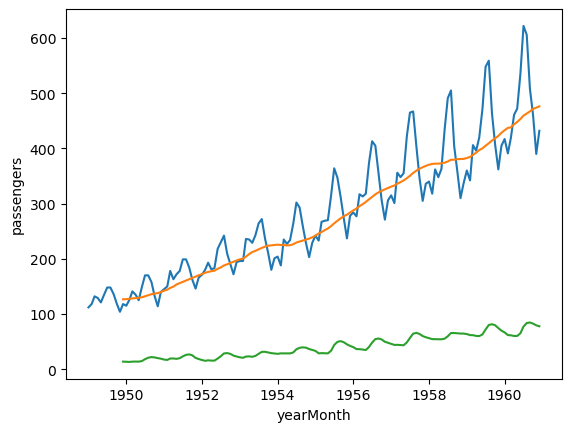

In [18]:
test_stationarity(df, 'passengers')

In [19]:
air_df = df[['passengers']]
air_df.head()

,passengers
yearMonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [21]:
# time shift

air_df['shift'] = air_df.passengers.shift()
air_df['shiftDiff'] = air_df.passengers - air_df['shift']
air_df.head()

C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\1951684519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift()
C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\1951684519.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff'] = air_df.passengers - air_df['shift']


,passengers,shift,shiftDiff
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean'] = dataframe[var].rolling(window=12).mean()
C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd'] = dataframe[var].rolling(window=12).std()


Test Statistics                 -2.657779
p-value                          0.081634
#lag used                       12.000000
number of observations used    119.000000
dtype: float64
criticality 1% : -3.4865346059036564
criticality 5% : -2.8861509858476264
criticality 10% : -2.579896092790057


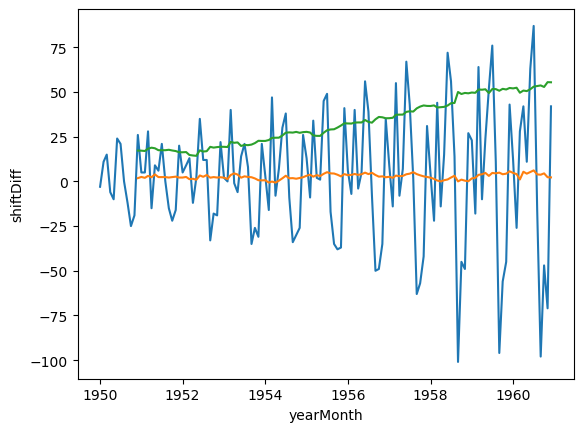

In [23]:
test_stationarity(air_df.dropna(), 'shiftDiff')

In [25]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\3829350932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearMonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean'] = dataframe[var].rolling(window=12).mean()
C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd'] = dataframe[var].rolling(window=12).std()


Test Statistics                 -1.717017
p-value                          0.422367
#lag used                       13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


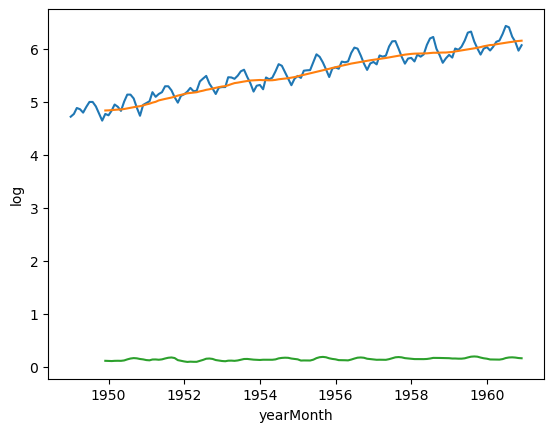

In [27]:
test_stationarity(log_df, 'log')

In [29]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2486983579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
yearMonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean'] = dataframe[var].rolling(window=12).mean()
C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd'] = dataframe[var].rolling(window=12).std()


Test Statistics                 -0.345854
p-value                          0.918754
#lag used                       13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


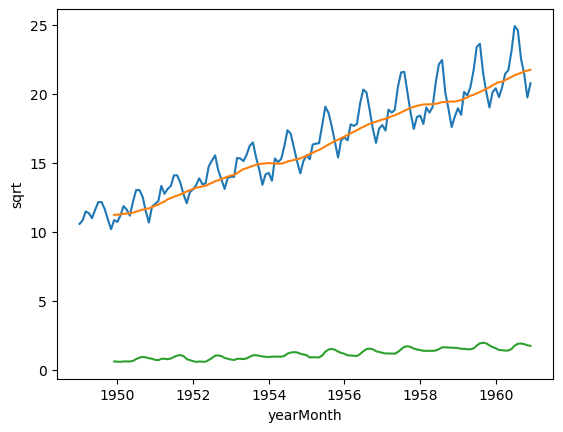

In [30]:
test_stationarity(sqrt_df, 'sqrt')

In [32]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(df['passengers'])
cbrt_df.head()

C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\1590778761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(df['passengers'])


,passengers,cbrt
yearMonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean'] = dataframe[var].rolling(window=12).mean()
C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd'] = dataframe[var].rolling(window=12).std()


Test Statistics                 -0.810035
p-value                          0.816157
#lag used                       13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


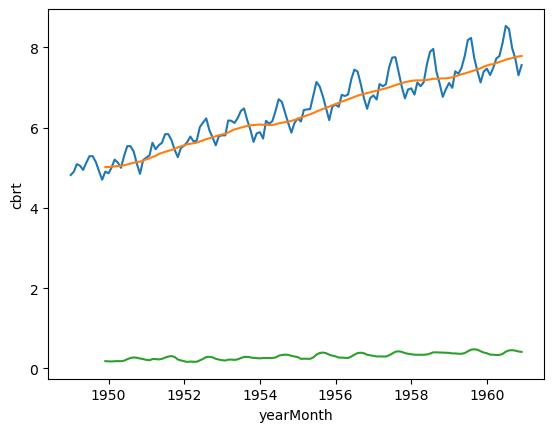

In [33]:
test_stationarity(cbrt_df, 'cbrt')

In [37]:
log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\910598541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logShiftDiff
yearMonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollMean'] = dataframe[var].rolling(window=12).mean()
C:\Users\jinyoung\AppData\Local\Temp\ipykernel_16180\2373059896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollStd'] = dataframe[var].rolling(window=12).std()


Test Statistics                 -3.071912
p-value                          0.028703
#lag used                       13.000000
number of observations used    118.000000
dtype: float64
criticality 1% : -3.4870216863700767
criticality 5% : -2.8863625166643136
criticality 10% : -2.580009026141913


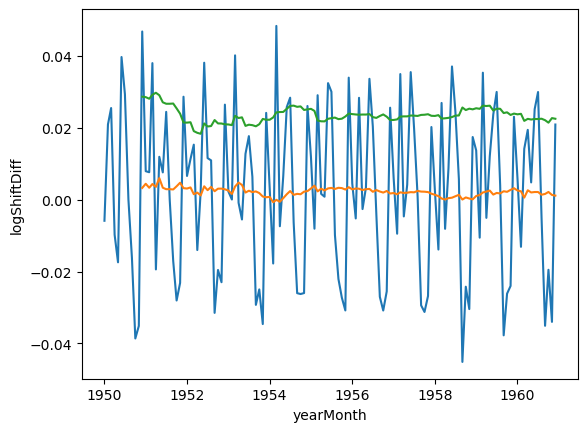

In [39]:
test_stationarity(log_df2.dropna(), 'logShiftDiff')